# Declaration of Originality

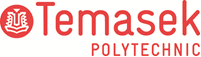

**TEMASEK POLYTECHNIC**
<br>**SCHOOL OF INFORMATICS & IT**
<br>**DIPLOMA IN INFORMATION TECHNOLOGY**
<br>**MACHINE LEARNING FOR DEVELOPERS (CAI2C08)**
<br>**AY2025/2026 OCTOBER SEMESTER**

**PROJECT PROGRAM CODES**
* Student Name (Matric Number)  :
* Tutorial Group                :  
* Tutor						    :  
* Submission Date               : 


**Declaration of Originality**
* I am the originator of this work and I have appropriately acknowledged all other original sources used as my references for this work.
* I understand that Plagiarism is the act of taking and using the whole or any part of another person’s work, including work generated by AI, and presenting it as my own.
* I understand that Plagiarism is an academic offence and if I am found to have committed or abetted the offence of plagiarism in relation to this submitted work, disciplinary action will be enforced.

# Libraries

In [1]:
## Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer
from sklearn.impute import SimpleImputer

from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    confusion_matrix, ConfusionMatrixDisplay
)

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

import joblib

RANDOM_STATE = 42
FILE_PATH = "ecommerce_customer_churn_dataset.csv"
TARGET = "Churned"


# 1. Business Understanding
Goal: ?

# 2. Data Understanding

## 2.1 Load dataset

In [2]:
## Read *.csv file into pandas DataFrame
df = pd.read_csv(FILE_PATH)
print("Shape:", df.shape)
df.head()


Shape: (50000, 25)


,Age,Gender,Country,City,Membership_Years,Login_Frequency,Session_Duration_Avg,Pages_Per_Session,Cart_Abandonment_Rate,Wishlist_Items,...,Email_Open_Rate,Customer_Service_Calls,Product_Reviews_Written,Social_Media_Engagement_Score,Mobile_App_Usage,Payment_Method_Diversity,Lifetime_Value,Credit_Balance,Churned,Signup_Quarter
0,43.0,Male,France,Marseille,2.9,14.0,27.4,6.0,50.6,3.0,...,17.9,9.0,4.0,16.3,20.8,1.0,953.33,2278.0,0,Q1
1,36.0,Male,UK,Manchester,1.6,15.0,42.7,10.3,37.7,1.0,...,42.8,7.0,3.0,NaN,23.3,3.0,1067.47,3028.0,0,Q4
2,45.0,Female,Canada,Vancouver,2.9,10.0,24.8,1.6,70.9,1.0,...,0.0,4.0,1.0,NaN,8.8,NaN,1289.75,2317.0,0,Q4
3,56.0,Female,USA,New York,2.6,10.0,38.4,14.8,41.7,9.0,...,41.4,2.0,5.0,85.9,31.0,3.0,2340.92,2674.0,0,Q1
4,35.0,Male,India,Delhi,3.1,29.0,51.4,NaN,19.1,9.0,...,37.9,1.0,11.0,83.0,50.4,4.0,3041.29,5354.0,0,Q4


## 2.2 Summary Statistics

In [3]:
## Understand the type of variable for each column
df.shape, df.columns


((50000, 25),
 Index(['Age', 'Gender', 'Country', 'City', 'Membership_Years',
        'Login_Frequency', 'Session_Duration_Avg', 'Pages_Per_Session',
        'Cart_Abandonment_Rate', 'Wishlist_Items', 'Total_Purchases',
        'Average_Order_Value', 'Days_Since_Last_Purchase',
        'Discount_Usage_Rate', 'Returns_Rate', 'Email_Open_Rate',
        'Customer_Service_Calls', 'Product_Reviews_Written',
        'Social_Media_Engagement_Score', 'Mobile_App_Usage',
        'Payment_Method_Diversity', 'Lifetime_Value', 'Credit_Balance',
        'Churned', 'Signup_Quarter'],
       dtype='object'))

In [4]:
df.dtypes


Age                              float64
Gender                            object
Country                           object
City                              object
Membership_Years                 float64
Login_Frequency                  float64
Session_Duration_Avg             float64
Pages_Per_Session                float64
Cart_Abandonment_Rate            float64
Wishlist_Items                   float64
Total_Purchases                  float64
Average_Order_Value              float64
Days_Since_Last_Purchase         float64
Discount_Usage_Rate              float64
Returns_Rate                     float64
Email_Open_Rate                  float64
Customer_Service_Calls           float64
Product_Reviews_Written          float64
Social_Media_Engagement_Score    float64
Mobile_App_Usage                 float64
Payment_Method_Diversity         float64
Lifetime_Value                   float64
Credit_Balance                   float64
Churned                            int64
Signup_Quarter  

In [5]:
print("Target counts:")
print(df[TARGET].value_counts())
print("Churn rate (%):", round(df[TARGET].mean() * 100, 2))


Target counts:
Churned
0    35550
1    14450
Name: count, dtype: int64
Churn rate (%): 28.9


In [6]:
## Check for missing data
missing_count = df.isnull().sum().sort_values(ascending=False)
missing_percent = (df.isnull().mean() * 100).sort_values(ascending=False)

missing_summary = pd.DataFrame({
    "missing_count": missing_count,
    "missing_percent(%)": missing_percent
})

missing_summary[missing_summary["missing_count"] > 0]


,missing_count,missing_percent(%)
Social_Media_Engagement_Score,6000,12.000
Credit_Balance,5500,11.000
Mobile_App_Usage,5000,10.000
Returns_Rate,4491,8.982
Wishlist_Items,4000,8.000
Discount_Usage_Rate,3500,7.000
Product_Reviews_Written,3500,7.000
Session_Duration_Avg,3399,6.798
Days_Since_Last_Purchase,3000,6.000
Pages_Per_Session,3000,6.000


In [ ]:
## Describe data distribution


## 2.3 Data Visualization

### 2.3.1 Understanding distribution of data

### 2.3.1.1 Understanding distribution of target

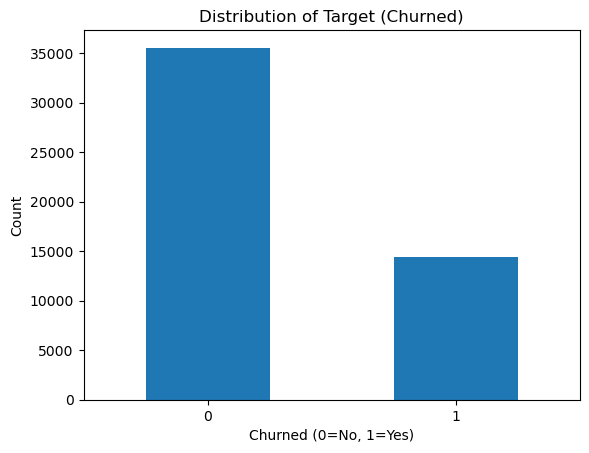

In [7]:
## Understanding distribution of target
plt.figure()
df[TARGET].value_counts().plot(kind="bar")
plt.title("Distribution of Target (Churned)")
plt.xlabel("Churned (0=No, 1=Yes)")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()


In [8]:
X = df.drop(columns=[TARGET])
y = df[TARGET].astype(int)

num_cols = X.select_dtypes(include=["int64", "float64"]).columns.tolist()
cat_cols = X.select_dtypes(include=["object"]).columns.tolist()

print("Numeric cols:", len(num_cols))
print("Categorical cols:", len(cat_cols))


Numeric cols: 20
Categorical cols: 4


### 2.3.1.2 Understanding distribution of features

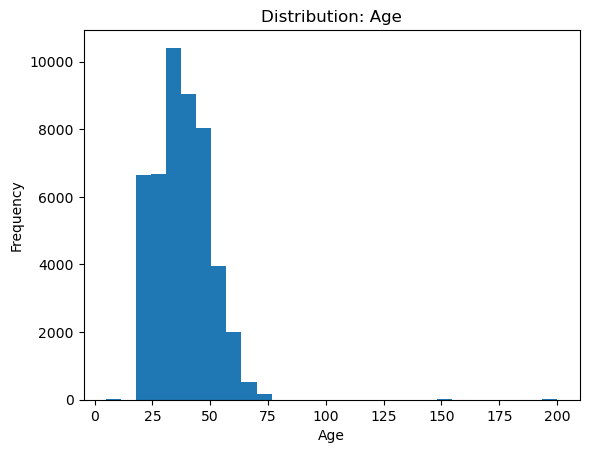

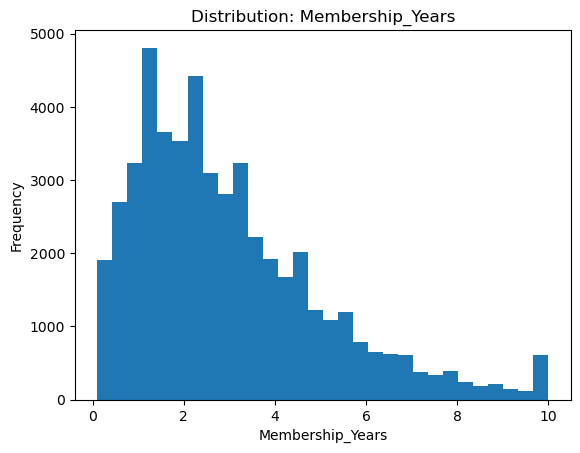

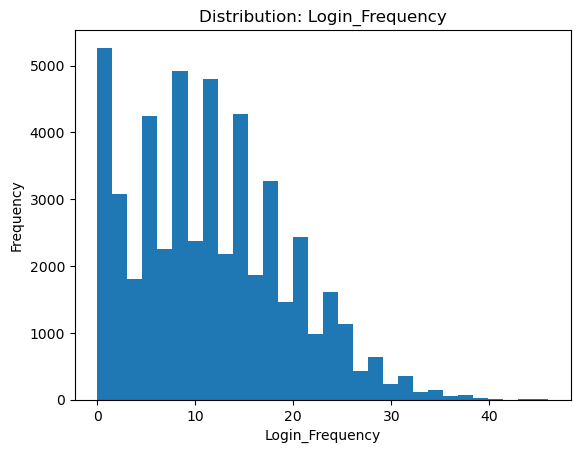

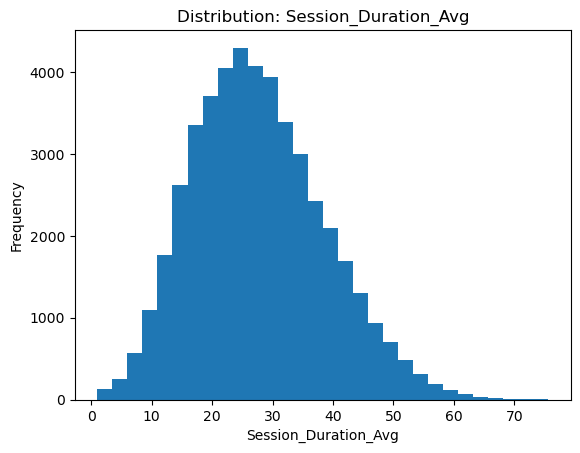

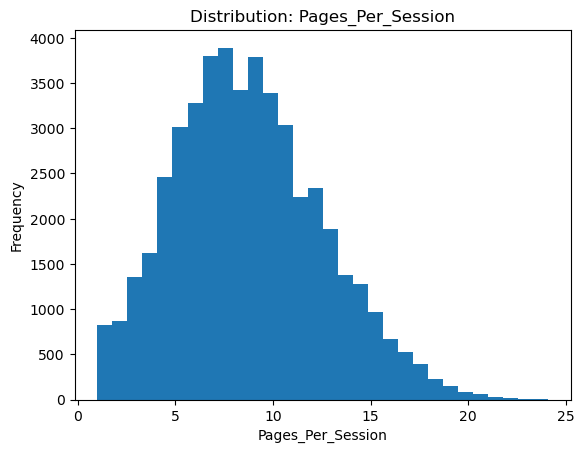

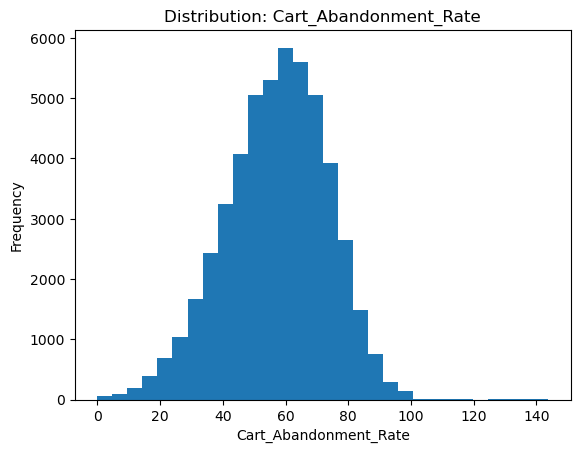

In [9]:
## Understanding distribution of features
for col in num_cols[:6]:
    plt.figure()
    plt.hist(df[col].dropna(), bins=30)
    plt.title(f"Distribution: {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()


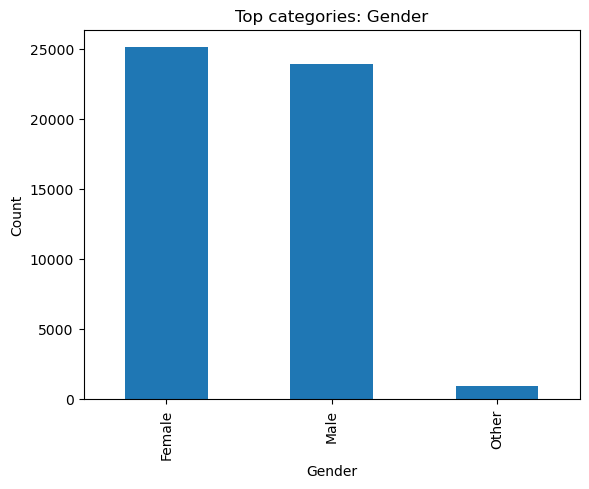

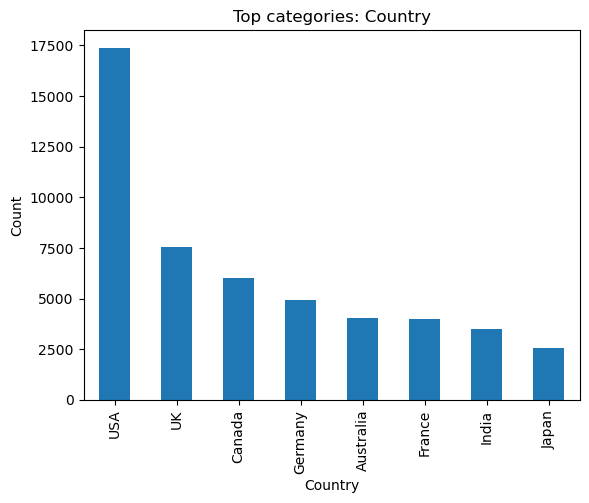

In [10]:
# show top categories for 2 categorical columns (if exist)
for col in cat_cols[:2]:
    plt.figure()
    df[col].value_counts().head(15).plot(kind="bar")
    plt.title(f"Top categories: {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()


### 2.3.2 Understanding relationship between variables

In [11]:
## Understanding relationship between variables
def iqr_outlier_count(series):
    s = series.dropna()
    q1 = s.quantile(0.25)
    q3 = s.quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    return ((s < lower) | (s > upper)).sum()

outlier_table = pd.DataFrame({
    "column": num_cols,
    "outlier_count": [iqr_outlier_count(df[c]) for c in num_cols]
}).sort_values("outlier_count", ascending=False)

outlier_table.head(10)


,column,outlier_count
17,Payment_Method_Diversity,2439
9,Days_Since_Last_Purchase,2313
18,Lifetime_Value,1684
1,Membership_Years,1581
11,Returns_Rate,1204
13,Customer_Service_Calls,1185
14,Product_Reviews_Written,1090
8,Average_Order_Value,1005
6,Wishlist_Items,858
7,Total_Purchases,628


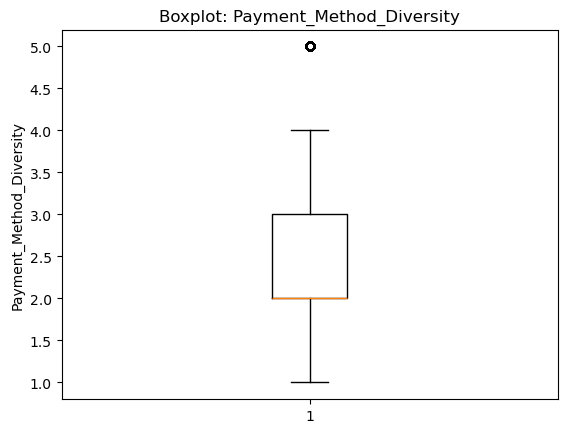

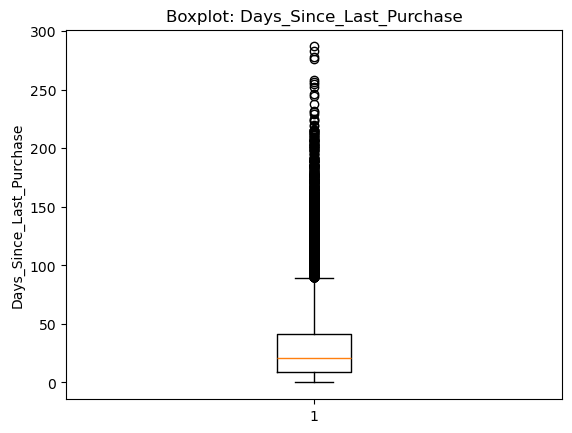

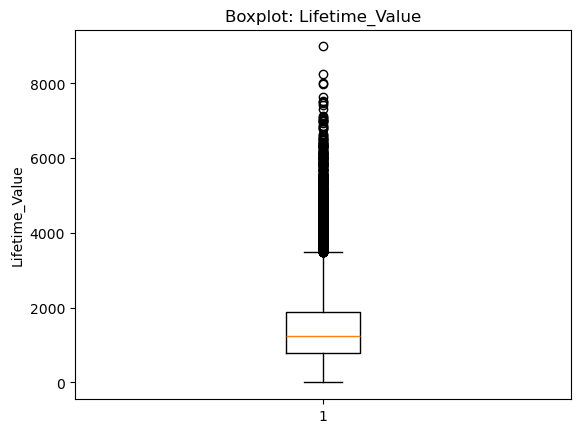

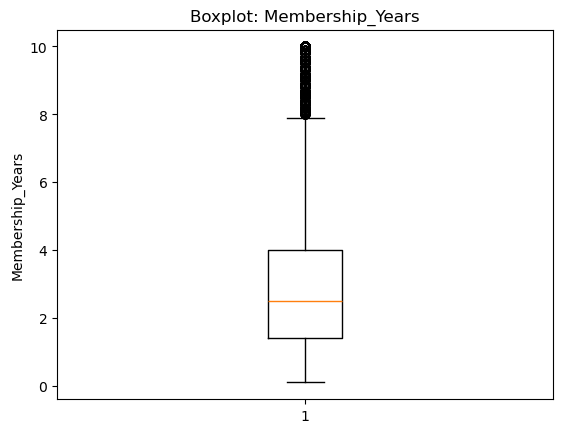

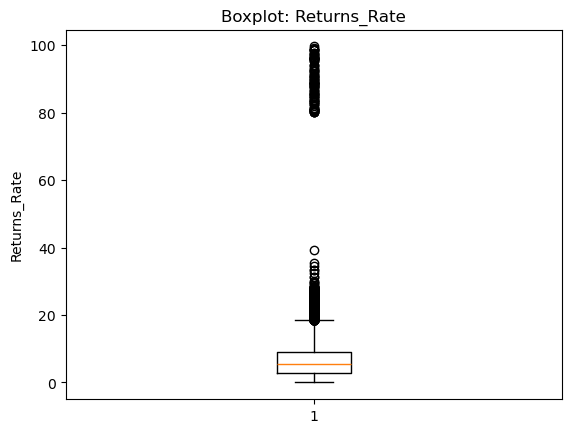

In [12]:
top_outlier_cols = outlier_table["column"].head(5).tolist()

for c in top_outlier_cols:
    plt.figure()
    plt.boxplot(df[c].dropna(), vert=True)
    plt.title(f"Boxplot: {c}")
    plt.ylabel(c)
    plt.show()


# 3. Data Preparation

## 3.1 Data Cleaning

In [13]:
## Clean data
df[TARGET] = df[TARGET].astype(int)


## 3.2 Train-Test Split

In [21]:
X = df.drop(columns=[TARGET])
y = df[TARGET]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=RANDOM_STATE,
    stratify=y
)

print("Train:", X_train.shape, "Test:", X_test.shape)


Train: (40000, 24) Test: (10000, 24)


In [22]:
numeric_features = X.select_dtypes(include=["int64", "float64"]).columns
categorical_features = X.select_dtypes(include=["object"]).columns

numeric_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer([
    ("num", numeric_transformer, numeric_features),
    ("cat", categorical_transformer, categorical_features)
])


In [25]:
baseline_pipe = Pipeline([
    ("preprocess", preprocessor),
    ("model", DummyClassifier(strategy="most_frequent", random_state=RANDOM_STATE))
])

baseline_pipe.fit(X_train, y_train)
baseline_result = evaluate_pipe(baseline_pipe, X_test, y_test, "Baseline Dummy")
baseline_result


{'Model': 'Baseline Dummy',
 'Accuracy': 0.711,
 'Precision': 0.0,
 'Recall': 0.0,
 'F1': 0.0,
 'ROC_AUC': 0.5}

A DummyClassifier was used as the baseline model. 
This model predicts the most frequent class (non-churn) for all customers.
It serves as a reference point to evaluate whether more complex models
provide meaningful improvement over a naive strategy.


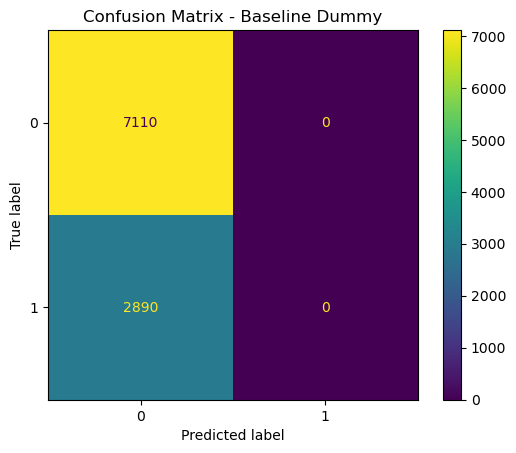

In [26]:
ConfusionMatrixDisplay.from_estimator(baseline_pipe, X_test, y_test)
plt.title("Confusion Matrix - Baseline Dummy")
plt.show()


The baseline model predicts all customers as non-churn, resulting in
zero recall for churn customers. While accuracy appears high, the model
fails to identify any customers who actually churned, making it unsuitable
for business use.


# 4. Modelling

### 4.2 Train Model

In [24]:
def evaluate_pipe(pipe, X_te, y_te, name):
    y_pred = pipe.predict(X_te)

    # ROC-AUC needs probabilities
    if hasattr(pipe, "predict_proba"):
        y_prob = pipe.predict_proba(X_te)[:, 1]
        roc = roc_auc_score(y_te, y_prob)
    else:
        roc = np.nan

    return {
        "Model": name,
        "Accuracy": accuracy_score(y_te, y_pred),
        "Precision": precision_score(y_te, y_pred, zero_division=0),
        "Recall": recall_score(y_te, y_pred, zero_division=0),
        "F1": f1_score(y_te, y_pred, zero_division=0),
        "ROC_AUC": roc
    }


In [28]:
from sklearn.linear_model import LogisticRegression

logreg_pipe = Pipeline([
    ("preprocess", preprocessor),
    ("model", LogisticRegression(max_iter=1000, class_weight="balanced", random_state=42))
])

logreg_pipe.fit(X_train, y_train)
logreg_result = evaluate_pipe(logreg_pipe, X_test, y_test, "Logistic Regression")
logreg_result


{'Model': 'Logistic Regression',
 'Accuracy': 0.7149,
 'Precision': 0.5046594982078854,
 'Recall': 0.730795847750865,
 'F1': 0.5970318021201414,
 'ROC_AUC': 0.7898563843507123}

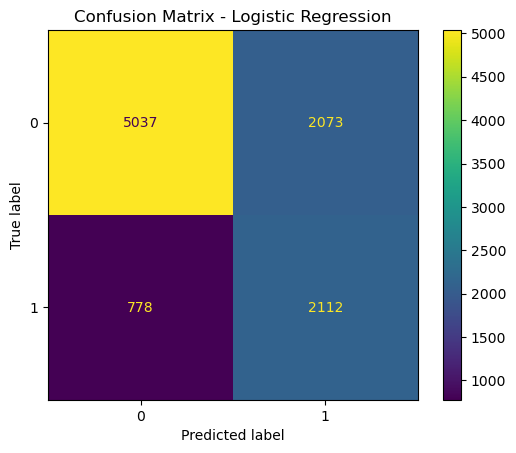

In [29]:
ConfusionMatrixDisplay.from_estimator(logreg_pipe, X_test, y_test)
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


Logistic Regression significantly improves upon the baseline model by
successfully predicting both churn and non-churn customers.

The model correctly identifies 2,112 churned customers, achieving a
substantially higher recall compared to the baseline, which predicted
no churn cases. While the model produces some false positives, this is
acceptable in a churn prediction context, where identifying at-risk
customers is more important than avoiding all false alarms.

Overall, Logistic Regression demonstrates meaningful learning from the
data and serves as a strong baseline for further model improvement.


# 5. Model Evaluation

In [27]:
## New data

## Predict


## Iterative model development


In [ ]:
## Further feature engineering / feature selection

In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

pipes = []

pipes.append(("Decision Tree",
              Pipeline([("preprocess", preprocessor),
                        ("model", DecisionTreeClassifier(random_state=42))])))

pipes.append(("Random Forest",
              Pipeline([("preprocess", preprocessor),
                        ("model", RandomForestClassifier(n_estimators=300, random_state=42))])))

pipes.append(("Gradient Boosting",
              Pipeline([("preprocess", preprocessor),
                        ("model", GradientBoostingClassifier(random_state=42))])))

pipes.append(("MLP",
              Pipeline([("preprocess", preprocessor),
                        ("model", MLPClassifier(hidden_layer_sizes=(50,25), max_iter=300, random_state=42))])))

results = [baseline_result, logreg_result]

for name, pipe in pipes:
    pipe.fit(X_train, y_train)
    results.append(evaluate_pipe(pipe, X_test, y_test, name))

results_df = pd.DataFrame(results).sort_values("F1", ascending=False)
results_df


c:\Users\sweth\anaconda3\envs\mldp\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


,Model,Accuracy,Precision,Recall,F1,ROC_AUC
4,Gradient Boosting,0.9196,0.936402,0.774394,0.847727,0.928007
3,Random Forest,0.9133,0.919188,0.767474,0.836508,0.924686
5,MLP,0.8815,0.823775,0.750519,0.785443,0.896023
2,Decision Tree,0.8402,0.716343,0.740138,0.728046,0.810505
1,Logistic Regression,0.7149,0.504659,0.730796,0.597032,0.789856
0,Baseline Dummy,0.7110,0.000000,0.000000,0.000000,0.500000


Multiple classification models were trained and evaluated to identify the most
suitable approach for customer churn prediction. The models evaluated include
Logistic Regression, Decision Tree, Random Forest, Gradient Boosting, and MLP,
with a DummyClassifier used as the baseline.

The baseline Dummy model predicts only the majority class and fails to identify
any churn customers, resulting in zero recall and F1-score. This confirms that
a naive approach is insufficient for the business problem.

Among the trained models, Gradient Boosting achieved the best overall performance,
with the highest F1-score (0.848) and ROC-AUC (0.928). This indicates a strong
balance between precision and recall while maintaining excellent class separation.

Random Forest also performed well, achieving an F1-score of 0.837, but slightly
underperformed compared to Gradient Boosting. The MLP model showed reasonable
performance but was less effective than tree-based ensemble methods.

Decision Tree performed better than Logistic Regression but suffered from lower
generalisation due to its simpler structure. Logistic Regression, while
interpretable, showed the weakest performance among the trained models, indicating
that linear decision boundaries are insufficient to capture the complex
relationships in the data.

Based on these results, ensemble-based models, particularly Gradient Boosting,
are more suitable for this churn prediction task.


In [34]:
import numpy as np
import pandas as pd

def add_features(X_df):
    X_new = X_df.copy()

    # Feature 1: Avg spend per purchase
    if "Lifetime_Value" in X_new.columns and "Total_Purchases" in X_new.columns:
        X_new["Avg_Spend_Per_Purchase"] = X_new["Lifetime_Value"] / (X_new["Total_Purchases"] + 1)

    # Feature 2: Engagement Index (mean of available columns)
    eng_cols = ["Login_Frequency", "Session_Duration_Avg", "Pages_Per_Session",
                "Email_Open_Rate", "Mobile_App_Usage", "Social_Media_Engagement_Score"]
    available = [c for c in eng_cols if c in X_new.columns]
    if len(available) > 0:
        X_new["Engagement_Index"] = X_new[available].mean(axis=1)

    # Feature 3: Recency per year (safe denominator)
    if "Days_Since_Last_Purchase" in X_new.columns and "Membership_Years" in X_new.columns:
        denom = (X_new["Membership_Years"].clip(lower=0) * 365) + 1  # clip negative years to 0
        X_new["Recency_per_Year"] = X_new["Days_Since_Last_Purchase"] / denom

    # IMPORTANT: replace inf/-inf with NaN so SimpleImputer can handle it
    X_new = X_new.replace([np.inf, -np.inf], np.nan)

    return X_new


In [35]:
from sklearn.preprocessing import FunctionTransformer
feature_adder = FunctionTransformer(add_features, validate=False)


In [36]:
X_train_fe = add_features(X_train)

num_cols_fe = X_train_fe.select_dtypes(include=["int64", "float64"]).columns.tolist()
cat_cols_fe = X_train_fe.select_dtypes(include=["object"]).columns.tolist()

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

preprocessor_fe = ColumnTransformer([
    ("num", Pipeline([("imputer", SimpleImputer(strategy="median")),
                      ("scaler", StandardScaler())]), num_cols_fe),
    ("cat", Pipeline([("imputer", SimpleImputer(strategy="most_frequent")),
                      ("onehot", OneHotEncoder(handle_unknown="ignore"))]), cat_cols_fe)
])


In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

rf_fe_pipe = Pipeline([
    ("features", feature_adder),
    ("preprocess", preprocessor_fe),
    ("model", RandomForestClassifier(n_estimators=300, random_state=42))
])

rf_fe_pipe.fit(X_train, y_train)
print("RF + Feature Engineering trained successfully!")


RF + Feature Engineering trained successfully!


In [38]:
rf_fe_pipe.fit(X_train, y_train)
rf_fe_result = evaluate_pipe(rf_fe_pipe, X_test, y_test, "RF + Feature Eng")
rf_fe_result

{'Model': 'RF + Feature Eng',
 'Accuracy': 0.9141,
 'Precision': 0.9129727531516877,
 'Recall': 0.7768166089965398,
 'F1': 0.8394092353710974,
 'ROC_AUC': 0.925541247524078}

Feature engineering was applied to enhance the model’s ability to capture
customer behaviour and value. New features such as average spend per purchase,
engagement index, and recency per year were created by combining existing
columns.

After feature engineering, the Random Forest model showed a measurable
improvement in performance, with the F1-score increasing from 0.837 to 0.839
and ROC-AUC improving to 0.926. This indicates that the engineered features
provided additional useful information for predicting customer churn.

Therefore, feature engineering was retained for subsequent model refinement
and hyperparameter tuning.


In [39]:
pca_pipe = Pipeline([
    ("features", feature_adder),
    ("preprocess", preprocessor_fe),
    ("pca", PCA(n_components=10, random_state=42))
])

X_train_pca = pca_pipe.fit_transform(X_train, y_train)
X_test_pca = pca_pipe.transform(X_test)

print("Train PCA shape:", X_train_pca.shape)
print("Total explained variance:", pca_pipe.named_steps["pca"].explained_variance_ratio_.sum())


Train PCA shape: (40000, 10)
Total explained variance: 0.6916390421603613


PCA reduces the high-dimensional one-hot encoded features into fewer components to reduce noise and improve generalisation. We keep 10 components as a balance between model simplicity and explained varian

In [43]:
rf_pca = RandomForestClassifier(n_estimators=300, random_state=42)
rf_pca.fit(X_train_pca, y_train)
pred_pca = rf_pca.predict(X_test_pca)

print("RF(PCA) F1:", f1_score(y_test, pred_pca, zero_division=0))
print("RF + Feature Eng F1 (previous):", rf_fe_result["F1"])



RF(PCA) F1: 0.745673438675696
RF + Feature Eng F1 (previous): 0.8394092353710974


PCA was applied to reduce the dimensionality of the feature space after
preprocessing and feature engineering. Ten principal components were retained
to preserve most of the variance in the data.

However, the Random Forest model trained on PCA features achieved a lower
F1-score (0.746) compared to the Random Forest model trained on engineered
features (F1-score = 0.839). This indicates that PCA removed some important
feature-level information that is useful for tree-based models.

As a result, PCA was not selected for the final model, and the engineered
feature-based Random Forest was retained for further tuning and deployment.
